<a href="https://colab.research.google.com/github/ruchithareddy269/Dm-assignment-8/blob/main/b_hierarchial_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install matplotlib
!pip install seaborn

In [3]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

In [4]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [10]:
dataset_file_path = '/content/drive/MyDrive/dm-assignment-6/OnlineRetail.csv'


In [11]:
# Load the dataset
file_path = dataset_file_path  # Update the file path
try:
    data = pd.read_csv(file_path, encoding='ISO-8859-1')
except Exception as e:
    print("Error loading file:", e)

In [12]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom


In [13]:
# Calculate total spend per customer
data['TotalSpend'] = data['Quantity'] * data['UnitPrice']
customer_data = data.groupby('CustomerID').agg(TotalSpend=('TotalSpend', 'sum'),
                                               AverageUnitPrice=('UnitPrice', 'mean'),
                                               PurchaseFreq=('InvoiceNo', 'nunique')).reset_index()


In [14]:
# Drop missing CustomerID
customer_data = customer_data.dropna(subset=['CustomerID'])

In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(customer_data[['TotalSpend', 'AverageUnitPrice', 'PurchaseFreq']])

In [20]:
from scipy.cluster.hierarchy import dendrogram, linkage
linked = linkage(scaled_features, method='ward')

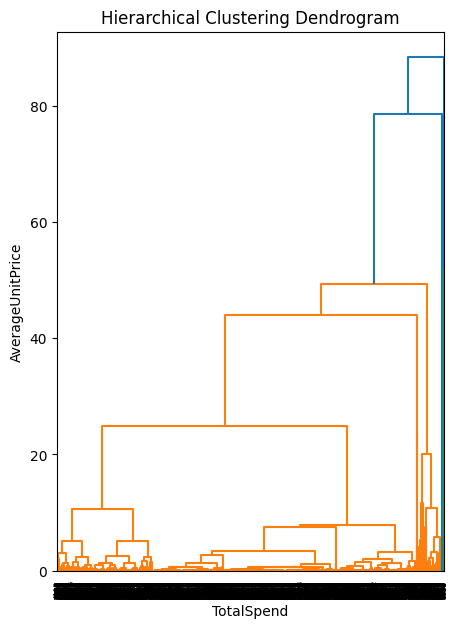

In [22]:
plt.figure(figsize=(5, 7))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('TotalSpend')
plt.ylabel('AverageUnitPrice')
plt.show()